In [43]:
import pandas as pd
from datetime import datetime
use_data = ["03", "05", "06", "07", "08", "09", "10", "11", "21"]

In [56]:
log_df = []
for suffix in use_data:
    log_df.append(pd.read_csv('datasets/merged' + suffix + '.txt'))
merged_df = pd.concat(log_df)
merged_df.head()

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
0,11-06 17:05:27.823,YES,963103842398,116,16185.0,2300,310260,19,-106,-10,UNKNOWN,116.0,0,15,-114,-15,4,8,5
1,11-06 17:05:29.918,YES,965204574639,116,16185.0,2300,310260,21,-102,-9,UNKNOWN,116.0,0,14,-113,-14,7,11,5
2,11-06 17:05:32.381,YES,967695762231,116,16185.0,2300,310260,22,-106,-12,UNKNOWN,116.0,0,14,-115,-18,8,9,6
3,11-06 17:05:34.873,YES,970146334089,116,16185.0,2300,310260,22,-103,-12,UNKNOWN,116.0,0,16,-111,-19,6,8,7
4,11-06 17:05:36.886,YES,972200049242,116,16185.0,2300,310260,20,-103,-10,UNKNOWN,116.0,0,15,-113,-18,5,10,8


In [125]:
activity_duration = [0, 0, 0, 0]
activity_name = ["WALKING", "STILL", "UNKNOWN", "NOVALUE"]
dict = {
    "WALKING": 0,
    "STILL" : 1,
    "UNKNOWN": 2,
    "NOVALUE": 3
}
prev_row = None
for index, row in merged_df.iterrows():
    if (prev_row is None):
        prev_row = row
        continue
    t1 = datetime.strptime(prev_row['time'], '%m-%d %H:%M:%S.%f')
    t2 = datetime.strptime(row['time'], '%m-%d %H:%M:%S.%f')
    duration = (t2-t1).total_seconds() / 60
    activity_duration[dict[prev_row['activity']]] += duration
    prev_row = row

activity_df = pd.DataFrame({'Activity': activity_name, 'Duration': activity_duration})
activity_df
# for i, activity in enumerate(activity_name):
# #     activity_data[activity] = activity_duration[i]
#     print(activity + ": " + str(activity_duration[i]))

,Activity,Duration
0,WALKING,21807.695183
1,STILL,752.172733
2,UNKNOWN,158.675383
3,NOVALUE,16669.712383


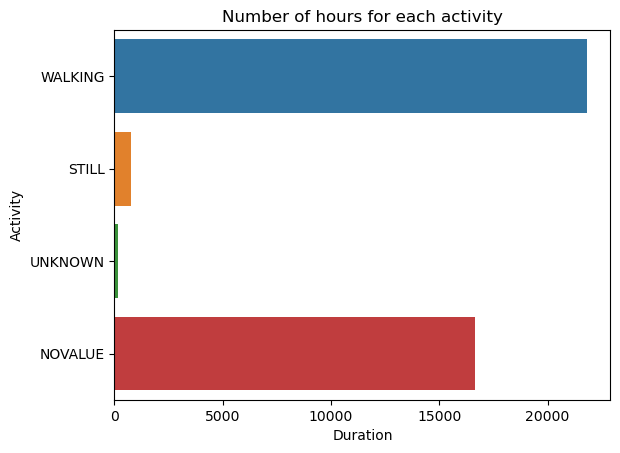

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for i, activity in enumerate(activity_name):
#     print(activity + ": " + str(activity_duration[i]))
    
sns.barplot(data=activity_df[:], x='Duration', y='Activity')

# fig = plt.figure(figsize = (8, 2))
# plt.barh(activity_name[:3], activity_duration[:3], height = 0.9)
# plt.xlabel("Activities")
# plt.ylabel("Duration")
plt.title("Number of hours for each activity")
# # plt.bar(activity_name[:3], activity_duration[:3], width = 0.4)
plt.show()

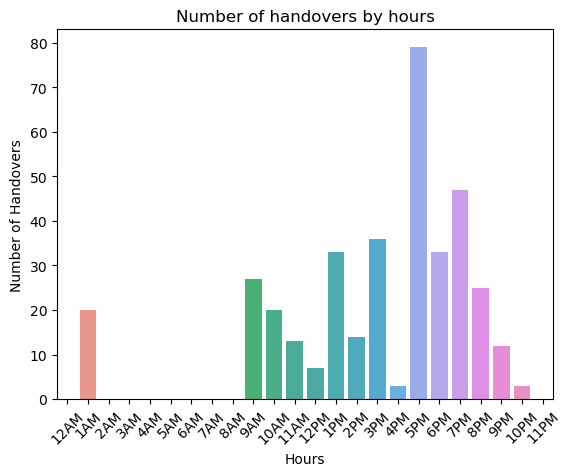

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time_df = merged_df['time']
hour = []
label = [ '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM',
         '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']
hours = np.zeros(24);
for index, row in merged_df.iterrows():
    if (prev_row is None):
        prev_row = row
        continue
    if (prev_row['mPci'] != row['mPci']):
        t2 = datetime.strptime(row['time'], '%m-%d %H:%M:%S.%f')
        h = t2.strftime("%H")
        hour.append(h)
        hours[int(h)] += 1
    prev_row = row
hours_df = pd.DataFrame({'Hours': label, 'Number of Handovers': hours})
# print(hours)
# print(label)
sns.barplot(data=hours_df[:], x='Hours', y='Number of Handovers')
plt.title('Number of handovers by hours')
plt.xticks(rotation=45)
# fig = plt.figure(figsize = (10, 3))
# plt.bar(label, hours, width = 1)
plt.show()